In [5]:
from extra_libraries import *

In [2]:
filepath = "C:\\Users\\Nikolas Theol\\AppData\\Local\\Programs\\Python\\Python38\\Scripts\\azureai-2021-team4\\data"
file = 'listings_log_metro_nik.csv'
total_filepath = filepath + "\\" + file


raw = pd.read_csv(total_filepath)

In [3]:
df = pd.DataFrame(data = raw)
pd.set_option('display.max_columns', None)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,distance_from_metro(meters),log_price,bathroom_is_private,a few days or more,within a day,within a few hours,within an hour,Entire home/apt,Hotel room,Private room,Shared room,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,ΑΚΡΟΠΟΛΗ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΝΩ ΚΥΨΕΛΗ,ΑΝΩ ΠΑΤΗΣΙΑ,ΒΟΤΑΝΙΚΟΣ,ΓΚΑΖΙ,ΓΚΥΖΗ,ΓΟΥΒΑ,ΓΟΥΔΙ,ΕΛΛΗΝΟΡΩΣΩΝ,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,ΖΑΠΠΕΙΟ,ΘΗΣΕΙΟ,ΙΛΙΣΙΑ,ΚΕΡΑΜΕΙΚΟΣ,ΚΟΛΟΚΥΝΘΟΥ,ΚΟΛΩΝΑΚΙ,ΚΟΛΩΝΟΣ,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,ΚΥΨΕΛΗ,ΛΥΚΑΒΗΤΤΟΣ,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,ΝΕΑ ΚΥΨΕΛΗ,ΝΕΟΣ ΚΟΣΜΟΣ,ΝΙΡΒΑΝΑ,ΠΑΓΚΡΑΤΙ,ΠΑΤΗΣΙΑ,ΠΕΔΙΟ ΑΡΕΩΣ,ΠΕΝΤΑΓΩΝΟ,ΠΕΤΡΑΛΩΝΑ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,ΠΟΛΥΓΩΝΟ,ΠΡΟΜΠΟΝΑ,ΡΗΓΙΛΛΗΣ,ΡΙΖΟΥΠΟΛΗ,ΣΕΠΟΛΙΑ,ΣΤΑΔΙΟ,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ
0,100.0,97.0,1,1,37.98863,23.76527,8,2.0,3.0,5.0,16.596542,84.0,1,6,6,0,0,1360.936717,4.430817,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100.0,97.0,1,1,37.98903,23.76448,4,1.0,1.0,1.0,18.256605,50.0,1,6,6,0,0,1342.290816,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100.0,97.0,1,1,37.98888,23.76473,2,1.0,1.0,1.0,15.197941,40.0,1,6,6,0,0,1345.840148,3.688879,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100.0,97.0,1,1,37.98903,23.76448,4,1.0,1.0,2.0,15.483294,50.0,1,6,6,0,0,1342.290816,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100.0,97.0,1,1,37.98924,23.76500,4,1.0,1.0,1.0,17.269814,50.0,1,6,6,0,0,1390.885000,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(['price','log_price'], axis=1)
y = df.price
y_log = df.log_price

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=123)

scaler = MinMaxScaler()  # define scaler
scaler.fit(X_train)  # fit scaler ONLY on the training data

# transform on both sets:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression grid.best_score_: -0.23809390235622002
Linear Regression grid.best_params_: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Linear Regression grid.best_estimator_: LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)
Linear Regression: training set model performance
R^2: 0.4133
RMSE: $43.4554 
Average Error: $20.8228
Accuracy = 60.834%. 

Linear Regression: test set model performance
R^2: 0.4353
RMSE: $39.8819 
Average Error: $19.5655
Accuracy = 62.568%. 



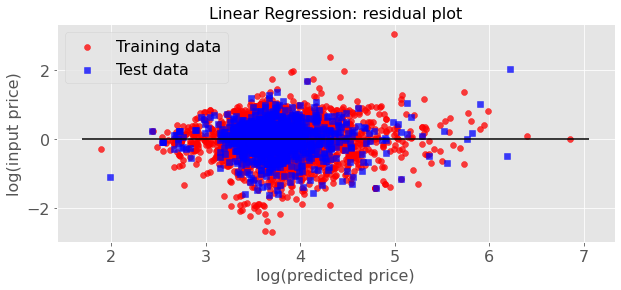

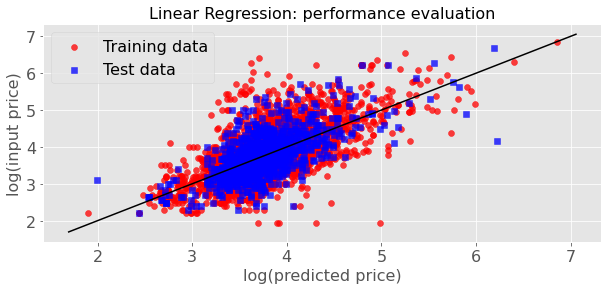

In [5]:
lr=LinearRegression(n_jobs=-1)
param_grid = dict(fit_intercept=[True,False], 
                  normalize=[True,False], 
                  copy_X=[True,False])

grid_lr=GridSearchCV(lr, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_lr.fit(X_train,y_train)

#print("grid.cv_results_ {}".format(grid_lr.cv_results_))
print("Linear Regression grid.best_score_: {}".format(grid_lr.best_score_))
print("Linear Regression grid.best_params_: {}".format(grid_lr.best_params_))
print("Linear Regression grid.best_estimator_: {}".format(grid_lr.best_estimator_))


model_lr = grid_lr.best_estimator_

title0='Linear Regression:'
model_tmp = model_lr

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

Linear Regression grid.best_score_: -0.23754027082308987
Linear Regression grid.best_params_: {'alpha': 0.00020235896477251576}
Linear Regression grid.best_estimator_: Lasso(alpha=0.00020235896477251576, max_iter=10000)
Lasso Regression: training set model performance
R^2: 0.4123
RMSE: $43.5087 
Average Error: $20.8308
Accuracy = 60.829%. 

Lasso Regression: test set model performance
R^2: 0.4364
RMSE: $39.5275 
Average Error: $19.5227
Accuracy = 62.633%. 



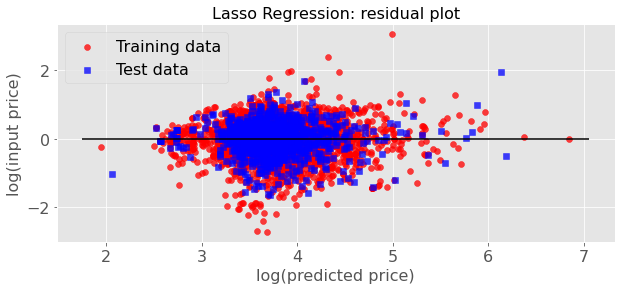

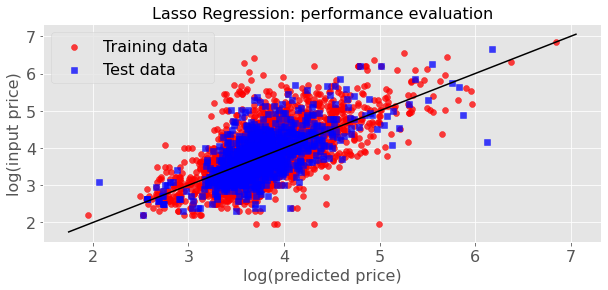

In [6]:
lasso = Lasso(max_iter = 10000)
param_grid =dict(alpha=np.logspace(-4,1,50))
grid_lasso = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_lasso.fit(X_train, y_train)

#print("grid.cv_results_ {}".format(grid_lr.cv_results_))
print("Linear Regression grid.best_score_: {}".format(grid_lasso.best_score_))
print("Linear Regression grid.best_params_: {}".format(grid_lasso.best_params_))
print("Linear Regression grid.best_estimator_: {}".format(grid_lasso.best_estimator_))

model_lasso = grid_lasso.best_estimator_

title0='Lasso Regression:'
model_tmp = model_lasso

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

Linear Regression grid.best_score_: -0.2375984428755496
Linear Regression grid.best_params_: {'alpha': 3.088843596477485}
Linear Regression grid.best_estimator_: Ridge(alpha=3.088843596477485)
Ridge Regression: training set model performance
R^2: 0.4125
RMSE: $43.4422 
Average Error: $20.8032
Accuracy = 60.830%. 

Ridge Regression: test set model performance
R^2: 0.4365
RMSE: $39.1769 
Average Error: $19.4860
Accuracy = 62.674%. 



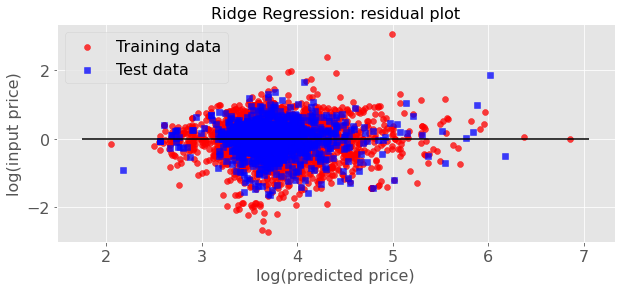

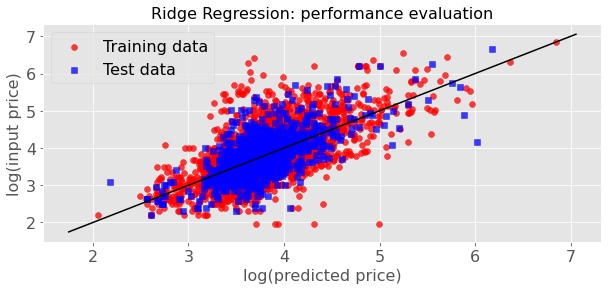

In [7]:
ridge = Ridge(alpha = 1000.0)
param_grid =dict(alpha=np.logspace(-4,1,50))
grid_ridge = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_ridge.fit(X_train, y_train)

#print("grid.cv_results_ {}".format(grid_lr.cv_results_))
print("Linear Regression grid.best_score_: {}".format(grid_ridge.best_score_))
print("Linear Regression grid.best_params_: {}".format(grid_ridge.best_params_))
print("Linear Regression grid.best_estimator_: {}".format(grid_ridge.best_estimator_))

model_ridge = grid_ridge.best_estimator_

title0='Ridge Regression:'
model_tmp = model_ridge

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

Random Forest Regression: training set model performance
R^2: 0.9362
RMSE: $19.9457 
Average Error: $7.4420
Accuracy = 88.320%. 

Random Forest Regression: test set model performance
R^2: 0.5786
RMSE: $32.3152 
Average Error: $16.2903
Accuracy = 68.666%. 



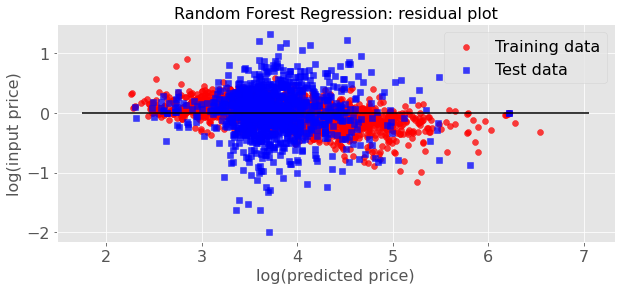

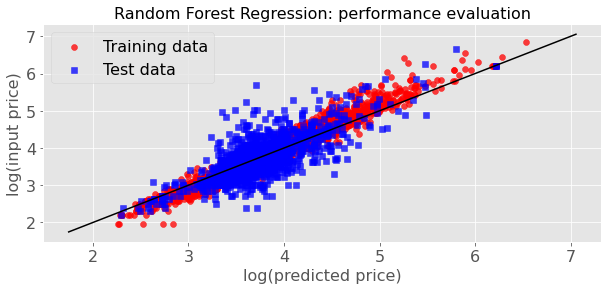

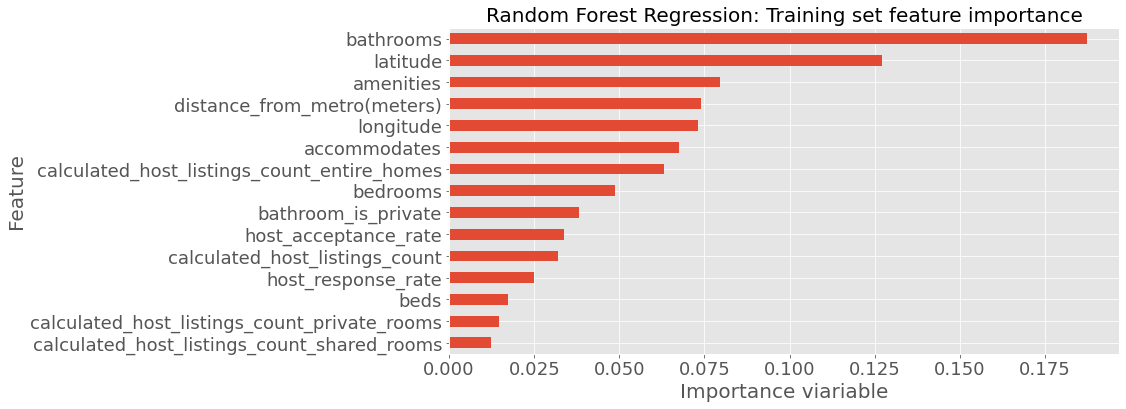

In [8]:
rf= RandomForestRegressor(n_estimators=200, random_state=0)

#param_grid = dict(n_estimators=[3000,4000,5000],
                #  max_depth=[None, 4],
                #  min_samples_leaf=[1,2])

#grid_rf=GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')

rf.fit(X_train,y_train)

#print("Random forest grid.cv_results_ {}".format(grid_rf.cv_results_))
#print("Random forest grid.best_score_ {}".format(grid_rf.best_score_))
#print("Random forest grid.best_params_ {}".format(grid_rf.best_params_))
#print("Random forest grid.best_estimator_ {}".format(grid_rf.best_estimator_))

#model_rf = grid_rf.best_estimator_

title0='Random Forest Regression:'
model_rf = rf

title=title0 + ' training set model performance'
prediction_train=evaluate(model_rf, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_rf, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

importances_train = pd.DataFrame({'Feature':X_train.columns, 'Importance':model_rf.feature_importances_})
importances_train = importances_train.sort_values('Importance',ascending=False).set_index('Feature')
feature_extraction(importances_train,'Random Forest Regression: Training set feature importance')

Gradient Boosting Regression: training set model performance
R^2: 0.5572
RMSE: $37.3353 
Average Error: $17.9577
Accuracy = 67.274%. 

Gradient Boosting Regression: test set model performance
R^2: 0.5495
RMSE: $31.5261 
Average Error: $16.8489
Accuracy = 67.541%. 



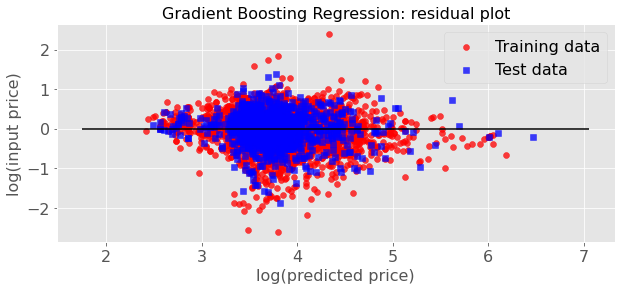

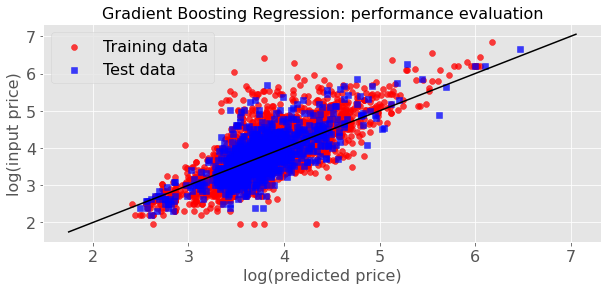

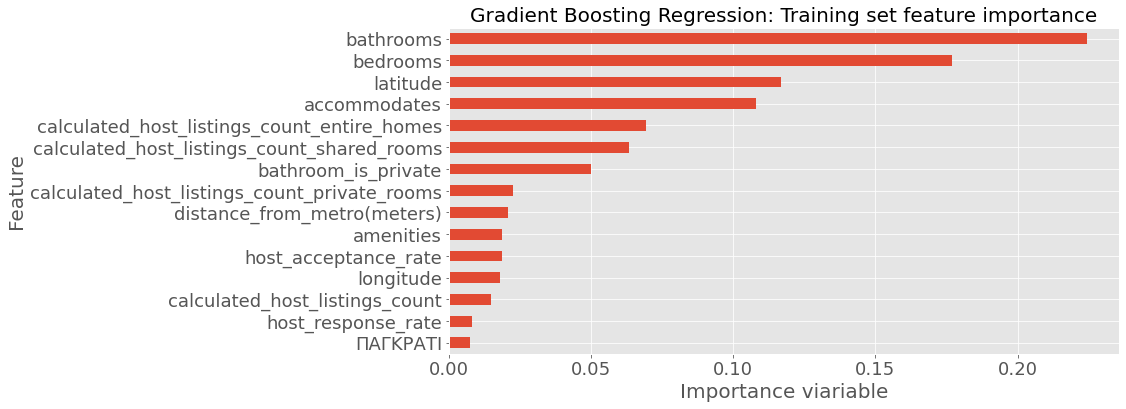

In [9]:
gbr = GradientBoostingRegressor()


gbr.fit(X_train,y_train)

model_gbr = gbr

title0='Gradient Boosting Regression:'
model_tmp = model_gbr

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

importances_train = pd.DataFrame({'Feature':X_train.columns, 'Importance':model_tmp.feature_importances_})
importances_train = importances_train.sort_values('Importance',ascending=False).set_index('Feature')
feature_extraction(importances_train,'Gradient Boosting Regression: Training set feature importance')

LGBMRegressor: training set model performance
R^2: 0.7563
RMSE: $29.1903 
Average Error: $12.9697
Accuracy = 76.950%. 

LGBMRegressor: test set model performance
R^2: 0.5944
RMSE: $29.9768 
Average Error: $15.8329
Accuracy = 69.749%. 



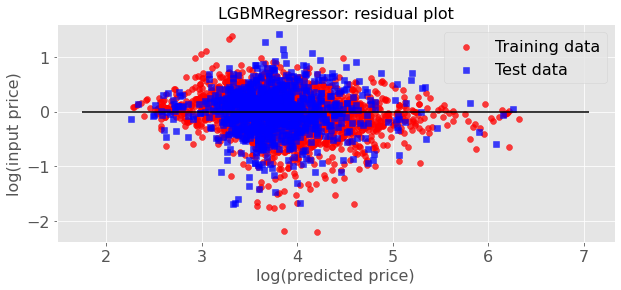

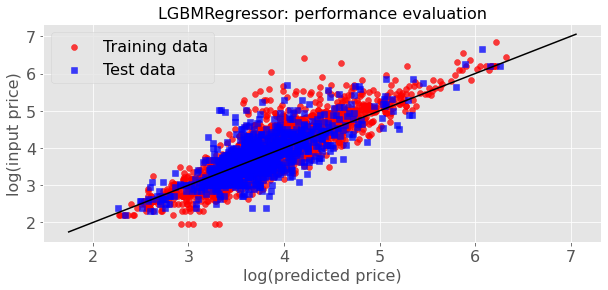

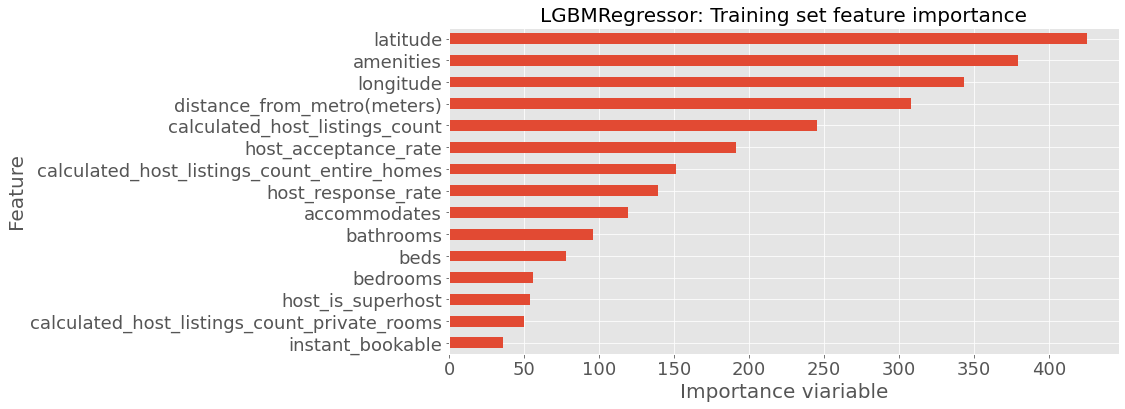

In [10]:
lgbm = LGBMRegressor()


lgbm.fit(X_train,y_train)

model_lgbm = lgbm

title0='LGBMRegressor:'
model_tmp = model_lgbm

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

importances_train = pd.DataFrame({'Feature':X_train.columns, 'Importance':model_tmp.feature_importances_})
importances_train = importances_train.sort_values('Importance',ascending=False).set_index('Feature')
feature_extraction(importances_train,'LGBMRegressor: Training set feature importance')

XGBRegressor: training set model performance
R^2: 0.9015
RMSE: $16.8820 
Average Error: $8.0232
Accuracy = 85.498%. 

XGBRegressor: test set model performance
R^2: 0.5697
RMSE: $30.5095 
Average Error: $16.3867
Accuracy = 69.155%. 



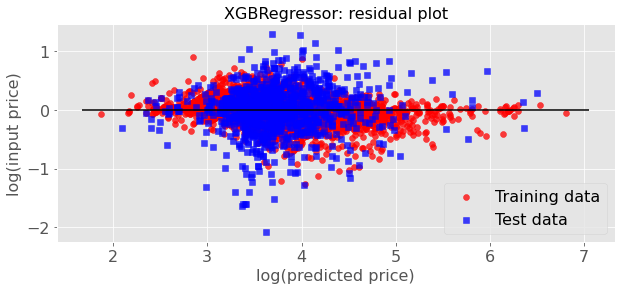

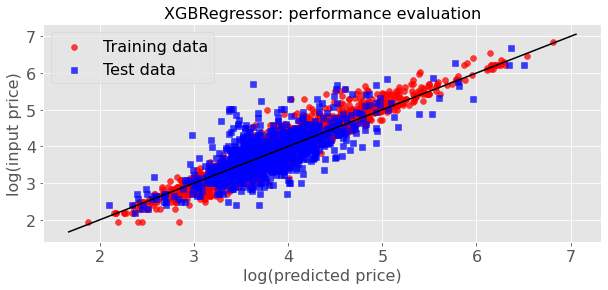

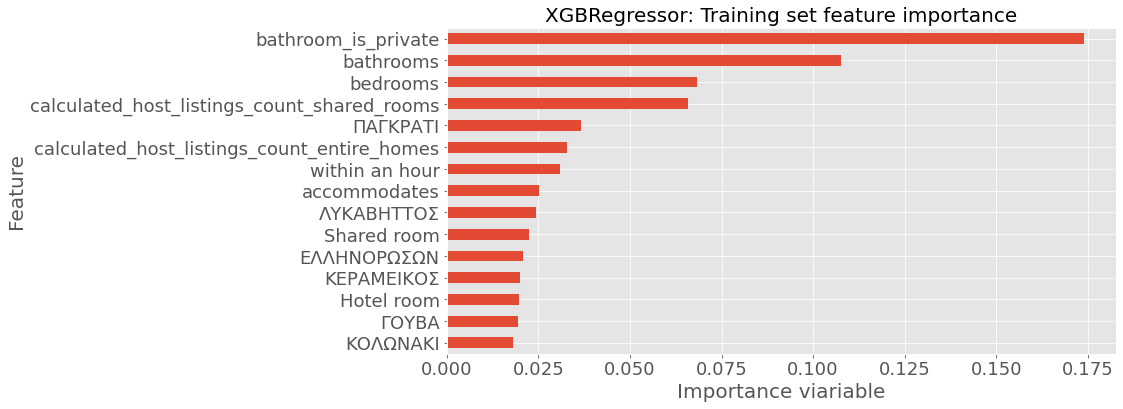

In [11]:
xgb_reg = xgb.XGBRegressor()


xgb_reg.fit(X_train,y_train)

model_xgb = xgb_reg

title0='XGBRegressor:'
model_tmp = model_xgb

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

importances_train = pd.DataFrame({'Feature':X_train.columns, 'Importance':model_tmp.feature_importances_})
importances_train = importances_train.sort_values('Importance',ascending=False).set_index('Feature')
feature_extraction(importances_train,'XGBRegressor: Training set feature importance')

AdaBoostRegressor: training set model performance
R^2: 0.3702
RMSE: $44.3498 
Average Error: $21.8431
Accuracy = 57.077%. 

AdaBoostRegressor: test set model performance
R^2: 0.3937
RMSE: $39.2642 
Average Error: $20.1328
Accuracy = 58.570%. 



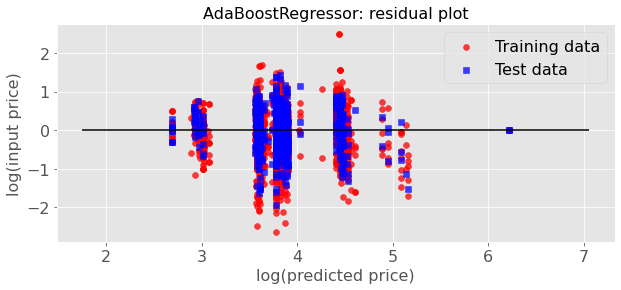

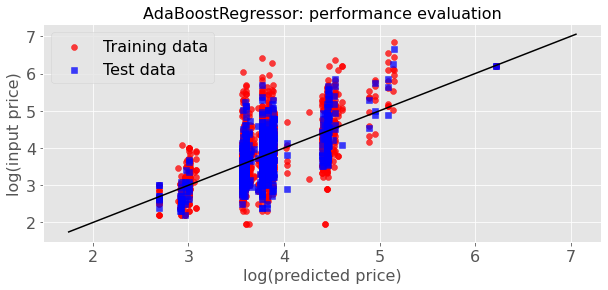

In [12]:
tuned_parameters = {
    "n_estimators": [10, 25, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
    "loss" : ['linear', 'square']
}

clf = GridSearchCV(AdaBoostRegressor(), cv=5, param_grid=tuned_parameters)

clf.fit(X_train,y_train)

model_ada = clf

title0='AdaBoostRegressor:'
model_tmp = model_ada

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

RandomForestRegressor: training set model performance
R^2: 0.9369
RMSE: $21.4703 
Average Error: $7.7090
Accuracy = 88.509%. 

RandomForestRegressor: test set model performance
R^2: 0.6039
RMSE: $34.1895 
Average Error: $15.9213
Accuracy = 70.526%. 



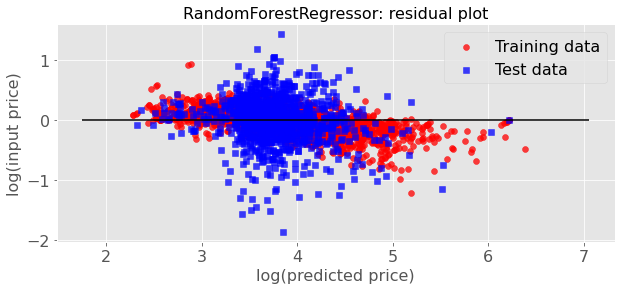

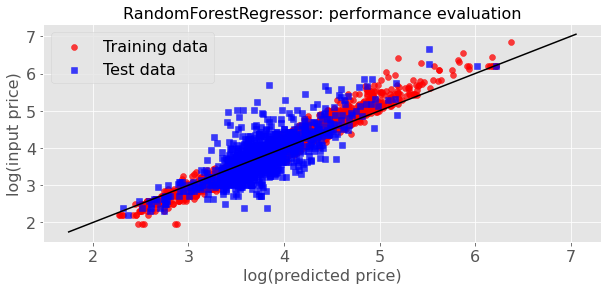

In [13]:
tuned_parameters = {
    "n_estimators": [50, 100, 150, 200],
    "n_jobs": [-1],
    "max_features": [None, 'log2', 'auto']
}

rf = GridSearchCV(RandomForestRegressor(), cv=5, param_grid=tuned_parameters)

rf.fit(X_train,y_train)

model_rf = rf

title0='RandomForestRegressor:'
model_tmp = model_rf

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)
